<a href="https://colab.research.google.com/github/shaikhmyousuf/Cranfield_IRP/blob/main/Radar_AE_CFZ1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import cv2
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose
from keras.models import Model
from keras.preprocessing import image
import statistics

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#GET LIST OF FILES
def getListOfFiles(dirName):
    # create a list of file and sub directories 
    # names in the given directory 
    listOfFile = os.listdir(dirName)
    allFiles = list()
    # Iterate over all the entries
    for entry in listOfFile:
        # Create full path
        fullPath = os.path.join(dirName, entry)
        # If entry is a directory then get the list of files in this directory 
        if os.path.isdir(fullPath):
            allFiles = allFiles + getListOfFiles(fullPath)
        else:
            allFiles.append(fullPath)               
    
    return allFiles

#READ TEXT FILES
def readFile(fileName):
        fileObj = open(fileName, "r") #opens the file in read mode
        words = fileObj.read().splitlines() #puts the file into an array
        fileObj.close()
        return words

def readFile2array(fileName):
        fileObj = open(fileName, "r") #opens the file in read mode
        words = fileObj.read().splitlines() #puts the file into an array
        fileObj.close()
        da = np.array(words)
        return da


#TURN TEXT FILES TO 75*4 ARRAYS
def text_to_array(data_array):
  bus_array = np.zeros((75,4))
  for i in range(len(data_array)-1):
    x = np.asarray(data_array[i].split())
    bus_array[i]=x
  if bus_array.any()!=0:
    loaded_bus = bus_array
  return loaded_bus

In [ ]:
list_of_files = getListOfFiles('/content/drive/MyDrive/irp/training_data/Train_Run_2/_out_rad_nose')

In [ ]:
list_of_files[7]

'/content/drive/MyDrive/irp/training_data/Train_Run_2/_out_rad_nose/143142.txt'

In [ ]:
radar_data_list = []
# for i in range(2):
#   da = readFile2array(list_of_files[i])
#   la = text_to_array(da)
#   radar_data_list.append(la)


for i in range(len(list_of_files)-1):
  da = readFile2array(list_of_files[i])
  la = text_to_array(da)
  radar_data_list.append(la)

In [ ]:
#radar_data_list

In [ ]:
X_train = np.array(radar_data_list)
X_train.shape
X_train_elev = X_train [:,:,0]#################################################

In [ ]:
X_train_elev[5].shape

(75,)

In [ ]:
minElement = np.amin(X_train_elev)
print('Minimum element from Numpy Array : ', minElement)

# Get the indices of minimum element in numpy array
result = np.where(X_train_elev == np.amin(X_train_elev))
print('Returned tuple of arrays :', result)
print('List of Indices of minimum element :', result[0])

Minimum element from Numpy Array :  -1133.2474365234375
Returned tuple of arrays : (array([5000]), array([26]))
List of Indices of minimum element : [5000]


In [ ]:
#X_train_elev[5000]
X_train_elev[7]

array([-1.99623621, -1.88950634, -1.98307049, -1.89865613, -1.99774873,
       -1.90227997, -1.99362481, -1.98995399, -1.99500501, -1.97721612,
       -1.90602601, -1.89648294, -1.89973676, -1.9817282 , -1.99649656,
       -1.99898338, -1.91234767, -1.99612868, -1.99846292, -1.97746444,
       -1.98940516, -1.99803376, -1.92440164, -1.96928167, -1.99748528,
       -1.99880457, -1.9058975 , -1.98303735, -1.93972683, -1.98880887,
       -1.99265969, -1.96842682, -1.951298  , -1.90788066, -1.92258513,
       -1.87666011, -1.9889673 , -1.99488294, -1.92732084, -1.99657285,
       -1.97408712, -1.95335197, -1.99570847, -1.99031663, -1.93203259,
       -1.95273447, -1.92654014, -1.92162645, -1.90288949,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [ ]:

mean = np.mean(X_train_elev[0])


In [ ]:
X_train_elev1 = np.delete(X_train_elev,5000, axis=0)

In [ ]:
X_train_elev1.shape

(5873, 75)

In [ ]:
meanlist = []
for i in range(5872):
  m = np.mean(X_train_elev1[i])
  meanlist.append(m)


In [ ]:
corrupt_data = []
for i in range(5872):
  if meanlist[i] == 0:
    corrupt_data.append(i)
print(corrupt_data)
print(len(corrupt_data))

[1, 8, 19, 22, 31, 41, 45, 49, 59, 75, 81, 87, 90, 93, 97, 99, 109, 119, 129, 158, 167, 169, 177, 179, 181, 185, 191, 213, 218, 224, 226, 231, 239, 244, 247, 256, 259, 261, 267, 269, 271, 273, 278, 281, 283, 285, 287, 293, 295, 299, 308, 317, 319, 328, 337, 339, 346, 353, 358, 360, 368, 378, 383, 395, 397, 399, 405, 414, 420, 425, 427, 449, 457, 459, 465, 469, 474, 480, 483, 486, 489, 498, 505, 509, 528, 530, 541, 543, 554, 556, 573, 575, 578, 587, 589, 591, 593, 600, 615, 617, 623, 647, 655, 666, 670, 684, 686, 693, 696, 714, 719, 722, 741, 754, 757, 759, 768, 776, 781, 796, 800, 806, 811, 818, 835, 837, 845, 848, 864, 875, 880, 887, 889, 906, 915, 924, 930, 932, 934, 940, 952, 963, 971, 980, 983, 985, 988, 993, 998, 1003, 1006, 1011, 1018, 1021, 1024, 1030, 1032, 1036, 1040, 1042, 1048, 1054, 1062, 1066, 1071, 1073, 1076, 1079, 1085, 1096, 1102, 1107, 1123, 1134, 1143, 1148, 1150, 1169, 1174, 1176, 1182, 1190, 1197, 1201, 1217, 1241, 1245, 1265, 1267, 1274, 1278, 1281, 1286, 1297, 13

In [ ]:
CDR = sorted(corrupt_data,reverse=True)

In [ ]:
CDR[0]

5871

In [ ]:
X_train_elev2 = X_train_elev1
for i in CDR:
  X_train_elev2 = np.delete(X_train_elev2,i,axis=0)


In [ ]:
X_train_elev2 = np.delete(X_train_elev2,8,axis=0)

In [ ]:
X_train_elev2.shape

(5000, 75)

In [ ]:
meanlist
index = meanlist.index(0)
print(index)


1


In [ ]:
meanlist_elev2 = []
for i in range(5000):
  m = np.mean(X_train_elev2[i])
  meanlist_elev2.append(m)

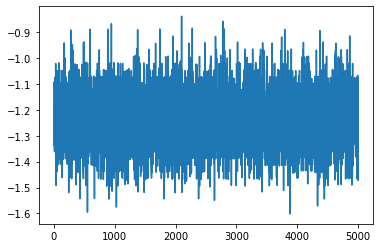

In [ ]:
x= range(5000)
y= meanlist_elev2
plt.plot(x,y)
plt.show()
##########YES!

In [ ]:
#minimum value of the training array
print(np.amin(X_train_elev2))
#next step is to add mimimum value to all values of the arrays.

-2.0001628398895264


In [ ]:
#make a new training array
X_train_elev3 = X_train_elev2

In [ ]:
#make an array that you add to the 5001 arrays in the training set 
#scale_array = np.full((75,),abs(np.amin(X_train_elev2)))
scale_array = np.full((75,),4) ################################################

In [ ]:
# #make a loop to add the scaling array to the trianing set
# #after this the minimum value should be zero
# X_train_elev4L = []
# for i in range(5001):
#   a = X_train_elev3[i]+scale_array
#   X_train_elev4L.append(a)

# #to check the minimum value is 0 and not negative
# print(np.amin(X_train_elev4L))
# #the above is a list so we must turn it into an array for training.
# X_train_elev4 = np.array(X_train_elev4L)
# X_train_elev4.shape

# #our final training set is --- X_train_elev4 ---
# #make sure that the testing data is also scaled up the similar way
# #by adding the same scaling constant using the ---scale_array---
X_train_elev4 = abs(X_train_elev2)

In [ ]:
print(np.amax(X_train_elev4))
print(np.amin(X_train_elev4))


2.0001628398895264
0.0


In [ ]:
encoder_input = keras.Input(shape=(75,), name='img')
#x = keras.layers.Flatten()(encoder_input) #300
x = keras.layers.Dense(64, activation = 'relu')(encoder_input)
encoder_output = keras.layers.Dense(32, activation="relu")(x)

#encoder = keras.Model(encoder_input, encoder_output, name='encoder')

decoder_input = keras.layers.Dense(64, activation="relu")(encoder_output)
#x = keras.layers.Dense(75, activation = 'relu')(decoder_input)
#x = keras.layers.Dense(784, activation="relu")(decoder_input)
decoder_output = keras.layers.Dense(75, activation="relu")(decoder_input)
#decoder_output = keras.layers.Reshape((75,))(x)

opt = tf.keras.optimizers.Adam(lr=0.001, decay=1e-6)

autoencoder = keras.Model(encoder_input, decoder_output, name='autoencoder')
autoencoder.summary()

autoencoder.compile(opt, loss='mse')

Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 img (InputLayer)            [(None, 75)]              0         
                                                                 
 dense (Dense)               (None, 64)                4864      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 64)                2112      
                                                                 
 dense_3 (Dense)             (None, 75)                4875      
                                                                 
Total params: 13,931
Trainable params: 13,931
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
history = autoencoder.fit(X_train_elev4[0:4500],X_train_elev4[0:4500], epochs=40, batch_size=32, validation_split=0.1) #x,y are x,x because youre mapping x to x

Epoch 1/40
127/127 [==============================] - 3s 3ms/step - loss: 0.9567 - val_loss: 0.8226
Epoch 2/40
127/127 [==============================] - 0s 2ms/step - loss: 0.8053 - val_loss: 0.8065
Epoch 3/40
127/127 [==============================] - 0s 2ms/step - loss: 0.7480 - val_loss: 0.7064
Epoch 4/40
127/127 [==============================] - 0s 2ms/step - loss: 0.6920 - val_loss: 0.6967
Epoch 5/40
127/127 [==============================] - 0s 2ms/step - loss: 0.6893 - val_loss: 0.6953
Epoch 6/40
127/127 [==============================] - 0s 2ms/step - loss: 0.6421 - val_loss: 0.6433
Epoch 7/40
127/127 [==============================] - 0s 2ms/step - loss: 0.6366 - val_loss: 0.6429
Epoch 8/40
127/127 [==============================] - 0s 2ms/step - loss: 0.6362 - val_loss: 0.6426
Epoch 9/40
127/127 [==============================] - 0s 2ms/step - loss: 0.6360 - val_loss: 0.6425
Epoch 10/40
127/127 [==============================] - 0s 2ms/step - loss: 0.6358 - val_loss: 0.6422

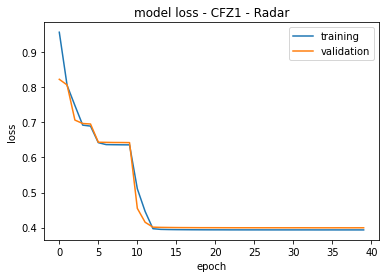

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss - CFZ1 - Radar')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

In [ ]:
#now make the validation set using the training set
#then run the predictions on the validation set
val_set = X_train_elev4[4501:5001]
predictions_val_set = autoencoder.predict(val_set)

#becasue we use portion of the training set to make the validation set, we dont have to scale it

In [ ]:
print(np.amin(X_train_elev4))

0.0


In [ ]:
print(np.amin(predictions_val_set))

0.0


In [ ]:
#now lets prepare the testing data
#ideally the esting data should contain both obstacle and obstacle free scenarios
#but we will begin with obstacle only for testing purposes
list_of_files_S2 = getListOfFiles('/content/drive/MyDrive/irp/Test_Scenarios/Test_S1/_out_rad_nose')
#list_of_files_S2 = getListOfFiles('/content/drive/MyDrive/irp/radar_nose_test')

In [ ]:
radar_data_list_S2 = []
for i in range(2):
  da = readFile2array(list_of_files_S2[i])
  la = text_to_array(da)
  radar_data_list_S2.append(la)

In [ ]:
list_of_files_S2

['/content/drive/MyDrive/irp/Test_Scenarios/Test_S1/_out_rad_nose/000338.txt',
 '/content/drive/MyDrive/irp/Test_Scenarios/Test_S1/_out_rad_nose/000339.txt']

In [ ]:
#isolate elevation column
X_test = np.array(radar_data_list_S2)
print(X_test.shape)
X_test_elev = X_test [:,:,0] ##################################################
print(X_test_elev.shape)

(2, 75, 4)
(2, 75)


In [ ]:
#check for erroneous data
minElement = np.amin(X_test_elev)
print('Minimum element from Numpy Array : ', minElement)

# Get the indices of minimum element in numpy array
result = np.where(X_test_elev == np.amin(X_test_elev))
print('Returned tuple of arrays :', result)
print('List of Indices of minimum element :', result[0])
#index 0 is messed up

Minimum element from Numpy Array :  -1.9993456602096558
Returned tuple of arrays : (array([1]), array([5]))
List of Indices of minimum element : [1]


In [ ]:
# #scale the testing data

# #make a loop to add the scaling array to the trianing set
# #after this the minimum value should be zero
# X_test_elevSL = []
# for i in range(2):
#   a = X_test_elev[i]+scale_array
#   X_test_elevSL.append(a)

# #to check the minimum value is 0 and not negative
# print(np.amin(X_test_elevSL))
# #the above is a list so we must turn it into an array for training.
# X_test_elevS = np.array(X_test_elevSL)
# X_test_elevS.shape

# #our final training set is --- X_train_elev4 ---
# #make sure that the testing data is also scaled up the similar way
# #by adding the same scaling constant using the ---scale_array---
X_test_elevS = abs(X_test_elev)


In [ ]:
predictions_test_S2 = autoencoder.predict(X_test_elevS)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics.pairwise import cosine_similarity
import statistics


In [ ]:
mse = mean_squared_error([X_test_elevS[1]],[predictions_test_S2[1]])
mse_clear = mean_squared_error([val_set[40]],[predictions_val_set[40]])
mae = mean_absolute_error([X_test_elevS[1]],[predictions_test_S2[1]])
mae_clear = mean_absolute_error([val_set[40]],[predictions_val_set[40]])
cs = cosine_similarity([X_test_elevS[1]],[predictions_test_S2[1]])
cs_clear = cosine_similarity([val_set[40]],[predictions_val_set[40]])
print('mse obstacle',mse)
print('mse clear', mse_clear)
print('mae obstacle',mae)
print('mae clear', mae_clear)
print('cs obstacle',cs)
print('cs clear', cs_clear)

mse obstacle 0.4107809384004336
mse clear 0.3634777104089009
mae obstacle 0.2260877784093221
mae clear 0.19944443702697753
cs obstacle [[0.91654899]]
cs clear [[0.92177419]]


In [ ]:
list_mse_clear = []
for i in range(499):
  mc = mean_squared_error(val_set[i],predictions_val_set[i])
  list_mse_clear.append(mc)
print('mean mse' , statistics.mean(list_mse_clear))
print('max mse' , max(list_mse_clear))

mean mse 0.39371444516451776
max mse 0.7234516009666163


In [ ]:
# True = False

SyntaxError: ignored

#Test System on unseen test set

In [ ]:
#import and process test set 

#data contains both obstacle and obstacle free scenarios

# list_of_files_truth = getListOfFiles('/content/drive/MyDrive/irp/test_dataset_radar/cfz1')

list_of_files_truth = getListOfFiles('/content/drive/MyDrive/irp/test_mix/mix1_rad')



In [ ]:
list_of_files_truth

['/content/drive/MyDrive/irp/test_mix/mix1_rad/07Hold2.txt',
 '/content/drive/MyDrive/irp/test_mix/mix1_rad/05desert.txt',
 '/content/drive/MyDrive/irp/test_mix/mix1_rad/01Airplane.txt',
 '/content/drive/MyDrive/irp/test_mix/mix1_rad/03firetruck.txt',
 '/content/drive/MyDrive/irp/test_mix/mix1_rad/02cube.txt',
 '/content/drive/MyDrive/irp/test_mix/mix1_rad/002428.txt',
 '/content/drive/MyDrive/irp/test_mix/mix1_rad/002429.txt',
 '/content/drive/MyDrive/irp/test_mix/mix1_rad/002430.txt',
 '/content/drive/MyDrive/irp/test_mix/mix1_rad/002431.txt',
 '/content/drive/MyDrive/irp/test_mix/mix1_rad/002432.txt',
 '/content/drive/MyDrive/irp/test_mix/mix1_rad/002433.txt',
 '/content/drive/MyDrive/irp/test_mix/mix1_rad/002434.txt',
 '/content/drive/MyDrive/irp/test_mix/mix1_rad/002435.txt',
 '/content/drive/MyDrive/irp/test_mix/mix1_rad/002437.txt',
 '/content/drive/MyDrive/irp/test_mix/mix1_rad/002438.txt',
 '/content/drive/MyDrive/irp/test_mix/mix1_rad/002439.txt',
 '/content/drive/MyDrive/irp

In [ ]:
len(list_of_files_truth)

42

In [ ]:
list_of_files_truth.sort(reverse=True)

In [ ]:
list_of_files_truth

['/content/drive/MyDrive/irp/test_mix/mix1_rad/09fog.txt',
 '/content/drive/MyDrive/irp/test_mix/mix1_rad/07Hold2.txt',
 '/content/drive/MyDrive/irp/test_mix/mix1_rad/05desert.txt',
 '/content/drive/MyDrive/irp/test_mix/mix1_rad/04fox.txt',
 '/content/drive/MyDrive/irp/test_mix/mix1_rad/03firetruck.txt',
 '/content/drive/MyDrive/irp/test_mix/mix1_rad/02cube.txt',
 '/content/drive/MyDrive/irp/test_mix/mix1_rad/01Airplane.txt',
 '/content/drive/MyDrive/irp/test_mix/mix1_rad/002467.txt',
 '/content/drive/MyDrive/irp/test_mix/mix1_rad/002465.txt',
 '/content/drive/MyDrive/irp/test_mix/mix1_rad/002464.txt',
 '/content/drive/MyDrive/irp/test_mix/mix1_rad/002463.txt',
 '/content/drive/MyDrive/irp/test_mix/mix1_rad/002462.txt',
 '/content/drive/MyDrive/irp/test_mix/mix1_rad/002461.txt',
 '/content/drive/MyDrive/irp/test_mix/mix1_rad/002460.txt',
 '/content/drive/MyDrive/irp/test_mix/mix1_rad/002459.txt',
 '/content/drive/MyDrive/irp/test_mix/mix1_rad/002457.txt',
 '/content/drive/MyDrive/irp/t

In [ ]:
radar_data_list_truth = []
for i in range(27):
  #list_of_files_truth.sort(reverse=True)
  da = readFile2array(list_of_files_truth[i])
  la = text_to_array(da)
  radar_data_list_truth.append(la)

this_is_a_really_long_variable_that_doesnt_need_to_be_that_long_but_since_this_is_a_thesis_it_finally_is_going_to_be_this_long = 'this_is_a_really_long_variable_that_doesnt_need_to_be_that_long_but_since_this_is_a_thesis_it_finally_is_going_to_be_this_long'

In [ ]:
#isolate elevation column
Y_true = np.array(radar_data_list_truth)
print(Y_true.shape)
Y_true_elev = Y_true [:,:,0] ##################################################
print(Y_true_elev.shape)

(27, 75, 4)
(27, 75)


In [ ]:

# #scale the testing data

# #make a loop to add the scaling array to the trianing set
# #after this the minimum value should be zero
# Y_true_elevSL = []
# for i in range(39):
#   a = Y_true_elev[i]+scale_array
#   Y_true_elevSL.append(a)

# #to check the minimum value is 0 and not negative
# print(np.amin(Y_true_elevSL))
# #the above is a list so we must turn it into an array for training.
# Y_true_elevS = np.array(Y_true_elevSL)
# Y_true_elevS.shape

# #our final training set is --- X_train_elev4 ---
# #make sure that the testing data is also scaled up the similar way
# #by adding the same scaling constant using the ---scale_array---

Y_true_elevS = abs(Y_true_elev)
Y_true_elevS.shape

(27, 75)

In [ ]:
#make predictions
Y_pred = autoencoder.predict(Y_true_elevS)

In [ ]:

mse_pred = []
for i in range(27):
  mse = mean_squared_error(Y_true_elevS[i],Y_pred[i])
  mse_pred.append(mse)

In [ ]:
mse_pred = []
for i in range(27):
  mse = mean_squared_error(Y_true_elevS[i],Y_pred[i])
  mse_pred.append(mse)

In [ ]:
mse_pred

[0.41010252889432897,
 0.4161440209716934,
 0.36339810280645773,
 0.46191414890026405,
 0.604803947019545,
 0.9994516476146993,
 0.6237980719761205,
 0.45977154754549643,
 0.2096115235700599,
 0.5634793945979734,
 0.4015790196960131,
 0.4713770476588093,
 0.620433366423667,
 0.3040854006440342,
 0.5220594974601303,
 0.3038289881108873,
 0.3176237379911885,
 0.4087384094378658,
 0.30954708738751663,
 0.5012292042472543,
 0.5209819680318155,
 0.4022004514628954,
 0.31217483648984984,
 0.3633981251141764,
 0.5621392364559654,
 0.4147368943951261,
 0.36485328788399896]

In [ ]:
sd=2
threshold = statistics.mean(list_mse_clear) + sd*statistics.stdev(list_mse_clear)
#threshold = 0.8
#threshold = 0.8
#print(threshold)

In [ ]:
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D

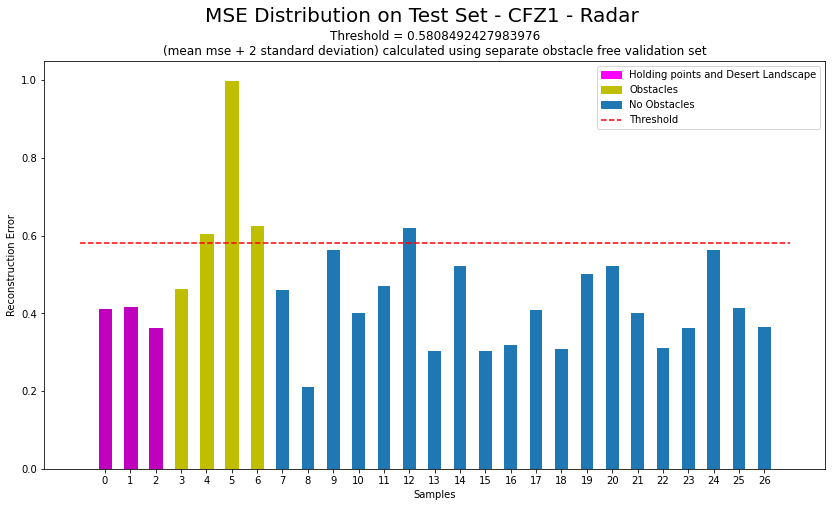

In [ ]:
x= range(27)
y= mse_pred
fig, ax = plt.subplots(figsize=(14, 7.5))
barlist = plt.bar(x,y, width=0.5)
barlist[0].set_color('m')
barlist[1].set_color('m')
barlist[2].set_color('m')
barlist[3].set_color('y')
barlist[4].set_color('y')
barlist[5].set_color('y')
barlist[6].set_color('y')
# barlist[7].set_color('y')
# barlist[8].set_color('y')
plt.hlines(threshold,-1,27,color='red', linestyle='--')

#Title and axes
plt.suptitle('MSE Distribution on Test Set - CFZ1 - Radar', fontsize = 20)
plt.title('Threshold = '+str(threshold)+'\n'+'(mean mse + '+str(sd)+' standard deviation) calculated using separate obstacle free validation set')
plt.xlabel('Samples', fontsize = 10)
plt.ylabel('Reconstruction Error',fontsize = 10)
plt.yticks(fontsize = 10)
plt.xticks(range(27),fontsize = 10)

#Legend
handles, labels = plt.gca().get_legend_handles_labels()
blue_patch = mpatches.Patch(color='tab:blue',label='No Obstacles')
yellow_patch = mpatches.Patch(color='y',label='Obstacles')
mag_patch = mpatches.Patch(color='magenta',label='Holding points and Desert Landscape')
line = Line2D([0],[0], label='Threshold',color='r',linestyle='--')
handles.extend([mag_patch, yellow_patch,blue_patch,line])
plt.legend(handles=handles)

plt.show()


#Confusion Matrix

In [ ]:
pred_action_list = []
for i in range(27):
  if mse_pred[i] > threshold:
    action = 'stop'
  else:
    action = 'go'
  pred_action_list.append(action)
pred_action_list

['go',
 'go',
 'go',
 'go',
 'stop',
 'stop',
 'stop',
 'go',
 'go',
 'go',
 'go',
 'go',
 'stop',
 'go',
 'go',
 'go',
 'go',
 'go',
 'go',
 'go',
 'go',
 'go',
 'go',
 'go',
 'go',
 'go',
 'go']

In [ ]:
true_action_list = []
for k in range(27):
    if (2<k<7):
      action = 'stop'
    else:
      action = "go"
    true_action_list.append(action)
true_action_list

['go',
 'go',
 'go',
 'stop',
 'stop',
 'stop',
 'stop',
 'go',
 'go',
 'go',
 'go',
 'go',
 'go',
 'go',
 'go',
 'go',
 'go',
 'go',
 'go',
 'go',
 'go',
 'go',
 'go',
 'go',
 'go',
 'go',
 'go']

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import plot_confusion_matrix

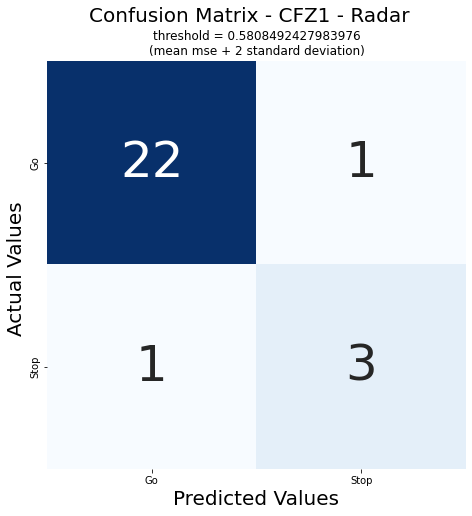

In [ ]:
cm = confusion_matrix(true_action_list, pred_action_list)
fig, ax = plt.subplots(figsize=(7.5, 7.5))
fx = sns.heatmap(cm, annot=True, cmap='Blues',cbar=False, annot_kws={'fontsize':50})

# labels the title and x, y axis of plot
plt.suptitle('Confusion Matrix - CFZ1 - Radar', fontsize = 20)
plt.title('threshold = '+str(threshold)+'\n'+'(mean mse + '+str(sd)+' standard deviation)')

# fx.set_xlabel('Predicted Values', )
plt.xlabel('Predicted Values', fontsize = 20)
plt.ylabel('Actual Values ', fontsize = 20);

# labels the boxes
fx.xaxis.set_ticklabels(['Go','Stop'])
fx.yaxis.set_ticklabels(['Go','Stop'])


plt.show()